# FNIRS FINGERPRINT SIMILARITY

### Loading in the dataset

Loading in the data and preparing for transformation

In [241]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# this data has already been pre-processed using Beer-Lambert Law
fnirs_data_file = "data/processed_data/all_p_OxySoft_block_data.csv"

fnirs_data = pd.read_csv(fnirs_data_file)
fnirs_data.head()

,Rx1 - Tx1 O2Hb,Rx1 - Tx1 HHb,Rx1 - Tx3 O2Hb,Rx1 - Tx3 HHb,Rx2 - Tx1 O2Hb,Rx2 - Tx1 HHb,Rx2 - Tx3 O2Hb,Rx2 - Tx3 HHb,Rx3 - Tx4 O2Hb,Rx3 - Tx4 HHb,...,Rx4 - Tx2 O2Hb,Rx4 - Tx2 HHb,Rx7 - Tx7 O2Hb,Rx7 - Tx7 HHb,time,marker,block_id,nback,movement,pid
0,3.820680,-2.139340,2.572835,-1.519247,2.417383,-2.846693,0.166226,-1.967860,3.041705,-2.268942,...,-8.290280,-32.084435,-1.000708,-1.160679,6.177546e+06,0/STANDING/REST,18.0,-1,STANDING,45827
1,3.795826,-2.146906,2.549216,-1.529765,2.406989,-2.851788,0.156035,-1.971403,2.941601,-2.362347,...,-8.284692,-32.092392,-1.041931,-1.161126,6.177546e+06,0/STANDING/REST,18.0,-1,STANDING,45827
2,3.795826,-2.146906,2.549216,-1.529765,2.406989,-2.851788,0.156035,-1.971403,2.941601,-2.362347,...,-8.284692,-32.092392,-1.041931,-1.161126,6.177546e+06,0/STANDING/REST,18.0,-1,STANDING,45827
3,3.771501,-2.153797,2.527086,-1.538656,2.396867,-2.853948,0.144468,-1.974760,2.716308,-2.275734,...,-8.281919,-32.097870,-1.069282,-1.166600,6.177546e+06,0/STANDING/REST,18.0,-1,STANDING,45827
4,3.771501,-2.153797,2.527086,-1.538656,2.396867,-2.853948,0.144468,-1.974760,2.716308,-2.275734,...,-8.281919,-32.097870,-1.069282,-1.166600,6.177546e+06,0/STANDING/REST,18.0,-1,STANDING,45827


## Generating the Fingerprints

The correlation matrices serve as the fingerprints in this case. The fingerprints are generated using the generate_matrices method defined below

In [60]:
def generate_matrices(pid, data, oxy=True, task_type=None):
    """Creates a matrix based on the pid and data arrays
    :param pid: pid of the participant
    :param data: all data
    :param oxy: whether oxy or not
    :param task_type: type of task (-1, 0, 1, 2)
    :return: matrix of participant data over each task type for every time series element"""
    # filter by participant ID and nback level
    participant_data = data[(data['pid'] == pid) & (data['nback'] == task_type)]

    # get only brain columns
    if oxy:
        data_cols = [col for col in participant_data.columns if "O2Hb" in col]
    else:
        data_cols = [col for col in participant_data.columns if "HHb" in col]

    data_timeseries = participant_data[data_cols]
    print(data_timeseries.shape)

    # compute the correlation matrix
    return data_timeseries.corr()

### All Similarity Matrices for Participant 45827

In [61]:
PID1 = 45827

p1_oxy_r = generate_matrices(PID1, fnirs_data, oxy=True, task_type=-1)
p1_oxy_r.head()

(33724, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.953545,0.956072,0.745656,0.786914,0.714173,0.823710,0.162905,0.883352,0.881755,0.868306,0.803562,0.552674,0.800448
Rx1 - Tx3 O2Hb,0.953545,1.000000,0.932564,0.844386,0.841686,0.716614,0.850395,0.144081,0.887000,0.906343,0.909844,0.880447,0.564797,0.768642
Rx2 - Tx1 O2Hb,0.956072,0.932564,1.000000,0.791907,0.821062,0.705258,0.845430,0.145940,0.910478,0.916648,0.904463,0.819259,0.633526,0.794780
Rx2 - Tx3 O2Hb,0.745656,0.844386,0.791907,1.000000,0.774486,0.681424,0.759610,0.181824,0.821269,0.858454,0.815067,0.880609,0.584782,0.670099
Rx3 - Tx4 O2Hb,0.786914,0.841686,0.821062,0.774486,1.000000,0.632452,0.769718,0.003578,0.745574,0.792463,0.806607,0.832983,0.508643,0.607095


In [62]:
p1_deoxy_r = generate_matrices(PID1, fnirs_data, oxy=False, task_type=-1)
p1_deoxy_r.head()

(33724, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.760388,0.759054,0.257167,0.291037,0.064681,0.482366,0.188498,0.563057,0.482973,0.657432,0.313383,0.275838,0.627252
Rx1 - Tx3 HHb,0.760388,1.000000,0.499803,0.530920,0.170457,0.059305,0.199467,0.053692,0.363847,0.272010,0.438288,0.288888,0.047054,0.358770
Rx2 - Tx1 HHb,0.759054,0.499803,1.000000,0.322454,0.292548,-0.027058,0.563156,0.231773,0.635825,0.576203,0.904839,0.574933,0.664526,0.524885
Rx2 - Tx3 HHb,0.257167,0.530920,0.322454,1.000000,0.077904,0.066381,0.082064,0.076722,0.114034,0.121837,0.269815,0.669309,0.371292,0.135838
Rx3 - Tx4 HHb,0.291037,0.170457,0.292548,0.077904,1.000000,0.555396,0.074568,-0.417661,0.163089,0.196045,0.277383,0.241928,0.234971,0.166436


In [63]:
p1_oxy_0 = generate_matrices(PID1, fnirs_data, oxy=True, task_type=0)
p1_oxy_0.head()

(40113, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.842917,0.961548,0.491122,0.732185,0.679232,0.728896,0.323000,0.815713,0.874306,0.779381,0.619674,0.424523,0.745779
Rx1 - Tx3 O2Hb,0.842917,1.000000,0.885989,0.817736,0.804667,0.583774,0.725900,0.219065,0.787667,0.871289,0.953572,0.833037,0.370130,0.545984
Rx2 - Tx1 O2Hb,0.961548,0.885989,1.000000,0.579118,0.788262,0.654540,0.726553,0.289138,0.850182,0.918840,0.846484,0.677957,0.341060,0.695759
Rx2 - Tx3 O2Hb,0.491122,0.817736,0.579118,1.000000,0.644829,0.316832,0.472501,0.009132,0.483657,0.567021,0.848109,0.875340,0.067276,0.186656
Rx3 - Tx4 O2Hb,0.732185,0.804667,0.788262,0.644829,1.000000,0.447128,0.607466,0.005262,0.600757,0.729563,0.823640,0.744269,0.214675,0.414759


In [64]:
p1_deoxy_0 = generate_matrices(PID1, fnirs_data, oxy=False, task_type=0)
p1_deoxy_0.head()

(40113, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.825191,0.897184,0.386138,0.403104,0.047437,0.566052,0.217369,0.773170,0.706160,0.787165,0.582047,0.010749,0.429349
Rx1 - Tx3 HHb,0.825191,1.000000,0.863931,0.714246,0.364288,0.024538,0.444508,0.191558,0.900058,0.868799,0.785825,0.801380,0.048323,0.288013
Rx2 - Tx1 HHb,0.897184,0.863931,1.000000,0.384867,0.397881,-0.025454,0.563718,0.159056,0.763215,0.695483,0.914116,0.596932,-0.139174,0.225106
Rx2 - Tx3 HHb,0.386138,0.714246,0.384867,1.000000,0.183870,-0.002543,0.063185,0.146664,0.742033,0.799737,0.390180,0.864822,0.204654,0.184257
Rx3 - Tx4 HHb,0.403104,0.364288,0.397881,0.183870,1.000000,0.456145,0.040071,-0.382712,0.289410,0.308834,0.368891,0.288008,-0.140374,0.091308


In [65]:
p1_oxy_1 = generate_matrices(PID1, fnirs_data, oxy=True, task_type=1)
p1_oxy_1.head()

(39842, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.815182,0.918722,0.651722,0.453941,0.540634,0.563370,0.297901,0.763094,0.812763,0.558165,0.646474,0.070326,0.738787
Rx1 - Tx3 O2Hb,0.815182,1.000000,0.790037,0.809079,0.565530,0.518200,0.736794,0.389752,0.800466,0.825315,0.772111,0.843035,0.023480,0.658537
Rx2 - Tx1 O2Hb,0.918722,0.790037,1.000000,0.590927,0.450462,0.465927,0.572850,0.293782,0.869988,0.879746,0.687869,0.697994,-0.016733,0.823283
Rx2 - Tx3 O2Hb,0.651722,0.809079,0.590927,1.000000,0.435938,0.400388,0.475115,0.248812,0.653995,0.686655,0.631692,0.764211,0.215757,0.436853
Rx3 - Tx4 O2Hb,0.453941,0.565530,0.450462,0.435938,1.000000,0.258937,0.393560,0.093727,0.486394,0.523412,0.475563,0.547137,0.238448,0.481010


In [66]:
p1_deoxy_1 = generate_matrices(PID1, fnirs_data, oxy=False, task_type=1)
p1_deoxy_1.head()

(39842, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.529801,0.820775,0.237059,0.210238,0.066904,0.306559,0.053296,0.612584,0.737799,0.836892,0.340073,0.364827,0.557215
Rx1 - Tx3 HHb,0.529801,1.000000,0.683236,0.822306,-0.078394,0.019983,-0.034677,0.050998,0.883866,0.804527,0.640751,0.760800,0.236588,0.510969
Rx2 - Tx1 HHb,0.820775,0.683236,1.000000,0.411389,0.190361,0.077685,0.152032,-0.053127,0.626709,0.684267,0.652419,0.353075,0.207753,0.502533
Rx2 - Tx3 HHb,0.237059,0.822306,0.411389,1.000000,-0.093938,0.126955,-0.121623,0.099350,0.769114,0.634421,0.313475,0.830493,0.233375,0.449213
Rx3 - Tx4 HHb,0.210238,-0.078394,0.190361,-0.093938,1.000000,0.636960,0.039483,-0.601468,-0.057802,0.032259,0.032469,-0.201318,0.248392,0.108772


In [67]:
p1_oxy_2 = generate_matrices(PID1, fnirs_data, oxy=True, task_type=2)
p1_oxy_2.head()

(38978, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.919181,0.975743,0.798894,0.662410,0.543782,0.720830,0.037041,0.886147,0.870652,0.792757,0.821106,0.680980,0.811358
Rx1 - Tx3 O2Hb,0.919181,1.000000,0.928702,0.935793,0.640331,0.578817,0.779465,0.079086,0.912527,0.922222,0.800352,0.870125,0.767272,0.836124
Rx2 - Tx1 O2Hb,0.975743,0.928702,1.000000,0.825801,0.654140,0.560093,0.778381,0.117456,0.934584,0.922418,0.810692,0.842869,0.701078,0.833847
Rx2 - Tx3 O2Hb,0.798894,0.935793,0.825801,1.000000,0.595250,0.520579,0.730073,0.097941,0.831066,0.860685,0.746495,0.846288,0.760619,0.743518
Rx3 - Tx4 O2Hb,0.662410,0.640331,0.654140,0.595250,1.000000,0.331403,0.578895,-0.147015,0.533450,0.527979,0.723574,0.711809,0.395404,0.421598


In [68]:
p1_deoxy_2 = generate_matrices(PID1, fnirs_data, oxy=False, task_type=2)
p1_deoxy_2.head()

(38978, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.515517,0.775594,0.089746,0.121371,-0.108136,0.416964,0.150702,0.579524,0.647396,0.647325,0.174562,-0.034305,0.445344
Rx1 - Tx3 HHb,0.515517,1.000000,0.496216,0.850218,0.142166,0.039174,0.073149,-0.006451,0.831846,0.805159,0.651221,0.782955,0.029011,0.159535
Rx2 - Tx1 HHb,0.775594,0.496216,1.000000,0.059403,-0.031791,-0.271374,0.279456,0.067038,0.461216,0.445947,0.773383,0.108648,-0.409769,0.212322
Rx2 - Tx3 HHb,0.089746,0.850218,0.059403,1.000000,0.165363,0.150193,-0.175575,-0.148945,0.612817,0.560721,0.304407,0.839128,0.180167,-0.098414
Rx3 - Tx4 HHb,0.121371,0.142166,-0.031791,0.165363,1.000000,0.623530,-0.220213,-0.637758,0.270382,0.238176,-0.039930,0.068841,0.296454,0.059800


### All Similarity Matrices for participant 63661

In [69]:
PID2 = 63661

p2_oxy_r = generate_matrices(PID2, fnirs_data, oxy=True, task_type=-1)
p2_oxy_r.head()

(32503, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.891514,0.957348,0.898283,0.516017,0.050586,-0.047458,-0.241422,0.881085,0.861039,0.897854,0.892773,0.297815,0.083477
Rx1 - Tx3 O2Hb,0.891514,1.000000,0.834801,0.754152,0.628822,0.087140,-0.054269,-0.101289,0.724292,0.886682,0.784680,0.757479,0.326025,0.008589
Rx2 - Tx1 O2Hb,0.957348,0.834801,1.000000,0.909129,0.546313,0.117572,-0.044755,-0.275129,0.889541,0.819845,0.937907,0.937246,0.293352,0.129978
Rx2 - Tx3 O2Hb,0.898283,0.754152,0.909129,1.000000,0.296684,0.011347,-0.056253,-0.460526,0.920450,0.714835,0.859160,0.908840,0.281278,-0.027069
Rx3 - Tx4 O2Hb,0.516017,0.628822,0.546313,0.296684,1.000000,0.292897,-0.038693,-0.016647,0.421247,0.604578,0.567292,0.430717,0.250324,0.195133


In [230]:
p2_deoxy_r = generate_matrices(PID2, fnirs_data, oxy=False, task_type=-1)
p1_deoxy_r.head()

(32503, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.760388,0.759054,0.257167,0.291037,0.064681,0.482366,0.188498,0.563057,0.482973,0.657432,0.313383,0.275838,0.627252
Rx1 - Tx3 HHb,0.760388,1.000000,0.499803,0.530920,0.170457,0.059305,0.199467,0.053692,0.363847,0.272010,0.438288,0.288888,0.047054,0.358770
Rx2 - Tx1 HHb,0.759054,0.499803,1.000000,0.322454,0.292548,-0.027058,0.563156,0.231773,0.635825,0.576203,0.904839,0.574933,0.664526,0.524885
Rx2 - Tx3 HHb,0.257167,0.530920,0.322454,1.000000,0.077904,0.066381,0.082064,0.076722,0.114034,0.121837,0.269815,0.669309,0.371292,0.135838
Rx3 - Tx4 HHb,0.291037,0.170457,0.292548,0.077904,1.000000,0.555396,0.074568,-0.417661,0.163089,0.196045,0.277383,0.241928,0.234971,0.166436


In [71]:
p2_oxy_0 = generate_matrices(PID2, fnirs_data, oxy=True, task_type=0)
p2_oxy_0.head()

(41026, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.837464,0.648212,0.567605,0.710143,0.182384,0.231446,0.424303,0.598032,0.729790,0.640319,0.748663,0.452725,0.559905
Rx1 - Tx3 O2Hb,0.837464,1.000000,0.845890,0.802386,0.702769,0.246283,0.257454,0.617160,0.726418,0.568549,0.752100,0.862707,0.504967,0.470916
Rx2 - Tx1 O2Hb,0.648212,0.845890,1.000000,0.918894,0.588614,0.400530,0.264430,0.803804,0.902435,0.316197,0.897972,0.855807,0.430047,0.568606
Rx2 - Tx3 O2Hb,0.567605,0.802386,0.918894,1.000000,0.489840,0.442972,0.218295,0.781170,0.816831,0.228577,0.823278,0.801454,0.457110,0.480186
Rx3 - Tx4 O2Hb,0.710143,0.702769,0.588614,0.489840,1.000000,0.138244,-0.006447,0.313874,0.525728,0.449722,0.535936,0.515130,0.247656,0.435293


In [72]:
p2_deoxy_0 = generate_matrices(PID2, fnirs_data, oxy=False, task_type=0)
p2_deoxy_0.head()

(41026, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.573907,0.252365,0.374898,-0.005032,-0.142402,0.124202,0.475526,0.340267,0.170472,0.332463,0.395106,-0.092433,-0.046631
Rx1 - Tx3 HHb,0.573907,1.000000,0.730494,0.785478,0.368359,-0.227464,0.028352,0.530790,0.734782,0.256029,0.807536,0.469714,-0.308348,-0.160380
Rx2 - Tx1 HHb,0.252365,0.730494,1.000000,0.902219,0.469148,0.022976,-0.020064,0.349868,0.862556,0.378606,0.908648,0.746247,-0.170286,-0.022739
Rx2 - Tx3 HHb,0.374898,0.785478,0.902219,1.000000,0.420349,0.076201,-0.038817,0.463743,0.904495,0.225089,0.910039,0.766762,-0.110216,-0.028871
Rx3 - Tx4 HHb,-0.005032,0.368359,0.469148,0.420349,1.000000,0.109166,-0.230387,0.282504,0.364141,0.030883,0.472167,0.273178,-0.077130,-0.066248


In [73]:
p2_oxy_1 = generate_matrices(PID2, fnirs_data, oxy=True, task_type=1)
p2_oxy_1.head()

(40365, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.935713,0.907952,0.864653,0.846016,0.699152,-0.221016,0.606278,0.832602,0.878957,0.868529,0.875000,0.627050,0.393125
Rx1 - Tx3 O2Hb,0.935713,1.000000,0.871901,0.894433,0.808218,0.580675,-0.232991,0.540240,0.815857,0.897590,0.869377,0.848203,0.498864,0.296497
Rx2 - Tx1 O2Hb,0.907952,0.871901,1.000000,0.902416,0.773985,0.714608,-0.271186,0.570388,0.856475,0.861018,0.954199,0.949989,0.552071,0.482959
Rx2 - Tx3 O2Hb,0.864653,0.894433,0.902416,1.000000,0.689823,0.595939,-0.274729,0.490248,0.842378,0.820424,0.904932,0.897942,0.429870,0.321520
Rx3 - Tx4 O2Hb,0.846016,0.808218,0.773985,0.689823,1.000000,0.683603,-0.078369,0.668856,0.786879,0.777602,0.765703,0.707890,0.675168,0.482207


In [74]:
p2_deoxy_1 = generate_matrices(PID2, fnirs_data, oxy=False, task_type=1)
p2_deoxy_1.head()

(40365, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.350377,0.539172,0.630907,-0.161189,0.181022,0.177594,0.153509,0.725710,0.278309,0.515171,0.537492,0.264679,0.129791
Rx1 - Tx3 HHb,0.350377,1.000000,0.344825,0.479391,0.246823,0.156859,0.030632,0.300694,0.464297,0.181576,0.499960,-0.073382,0.367666,-0.015264
Rx2 - Tx1 HHb,0.539172,0.344825,1.000000,0.816258,0.164524,0.086388,-0.054346,-0.370853,0.740295,0.388898,0.822655,0.678249,0.201438,0.171785
Rx2 - Tx3 HHb,0.630907,0.479391,0.816258,1.000000,0.011578,0.260308,0.032279,-0.142000,0.839529,0.234826,0.782627,0.549284,0.372000,0.132637
Rx3 - Tx4 HHb,-0.161189,0.246823,0.164524,0.011578,1.000000,-0.147317,-0.510496,-0.281661,-0.147841,0.264294,0.022408,-0.003522,-0.081242,0.082956


In [75]:
p2_oxy_2 = generate_matrices(PID2, fnirs_data, oxy=True, task_type=2)
p2_oxy_2.head()

(41702, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.980995,0.895042,0.903347,0.779027,0.747567,0.142193,0.771039,0.903801,0.926124,0.873626,0.881738,0.535626,0.705943
Rx1 - Tx3 O2Hb,0.980995,1.000000,0.878655,0.914996,0.760248,0.771591,0.091108,0.745734,0.870895,0.912134,0.848874,0.860700,0.577040,0.684527
Rx2 - Tx1 O2Hb,0.895042,0.878655,1.000000,0.941351,0.794677,0.788073,0.168653,0.819142,0.832981,0.909292,0.919186,0.903319,0.609876,0.754718
Rx2 - Tx3 O2Hb,0.903347,0.914996,0.941351,1.000000,0.776581,0.794215,0.096330,0.734528,0.801955,0.898952,0.870773,0.895105,0.575638,0.678110
Rx3 - Tx4 O2Hb,0.779027,0.760248,0.794677,0.776581,1.000000,0.801032,0.050785,0.669799,0.658961,0.746911,0.653869,0.629452,0.681514,0.669907


In [76]:
p2_deoxy_2 = generate_matrices(PID2, fnirs_data, oxy=False, task_type=2)
p2_deoxy_2.head()

(41702, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.514851,0.485388,0.716988,0.197323,0.346607,-0.029114,0.299831,0.623532,0.285117,0.405108,0.175459,0.176993,0.369754
Rx1 - Tx3 HHb,0.514851,1.000000,0.652806,0.772066,0.251279,-0.248613,-0.072889,-0.196726,0.063835,0.507659,0.615114,0.135981,-0.286900,-0.205437
Rx2 - Tx1 HHb,0.485388,0.652806,1.000000,0.603962,0.521700,-0.234682,-0.002753,-0.108181,-0.016620,0.631179,0.632255,0.307748,-0.192602,-0.079184
Rx2 - Tx3 HHb,0.716988,0.772066,0.603962,1.000000,0.147087,0.130307,-0.058636,0.113884,0.459694,0.275205,0.517443,0.103725,0.020972,0.149280
Rx3 - Tx4 HHb,0.197323,0.251279,0.521700,0.147087,1.000000,-0.089666,-0.236957,-0.041359,-0.174520,0.468834,0.227297,0.201634,-0.113054,-0.025795


## Methods for Visualizing/Computing Similarity between Participants

In [244]:
def plot_roi_condition(data):
    """Plots the distribution of correlation coefficient values across multiple participants for a given task and oxy/deoxy
    :param data: dictionary with pid's to correlation matrices"""
    # makes a figure with multiple subplots
    fig, ax = plt.subplots(figsize=(12, 8))

    for pid, matrices in data.items():
        # combines all correlation values from all matrices
        all_corrs = []
        for matrix in matrices:
            all_corrs.extend(matrix.mean(axis=0))

        #print(all_corrs)

        ax.plot(all_corrs, label=f"P{pid}")

    ax.set_xlabel("Index (ROI x Condition)")
    ax.set_ylabel("Mean Correlation per ROI")
    ax.set_title("Mean connectivity by ROI across conditions")
    ax.legend()
    ax.grid(alpha=0.5, linestyle='--')
    # plot distributions



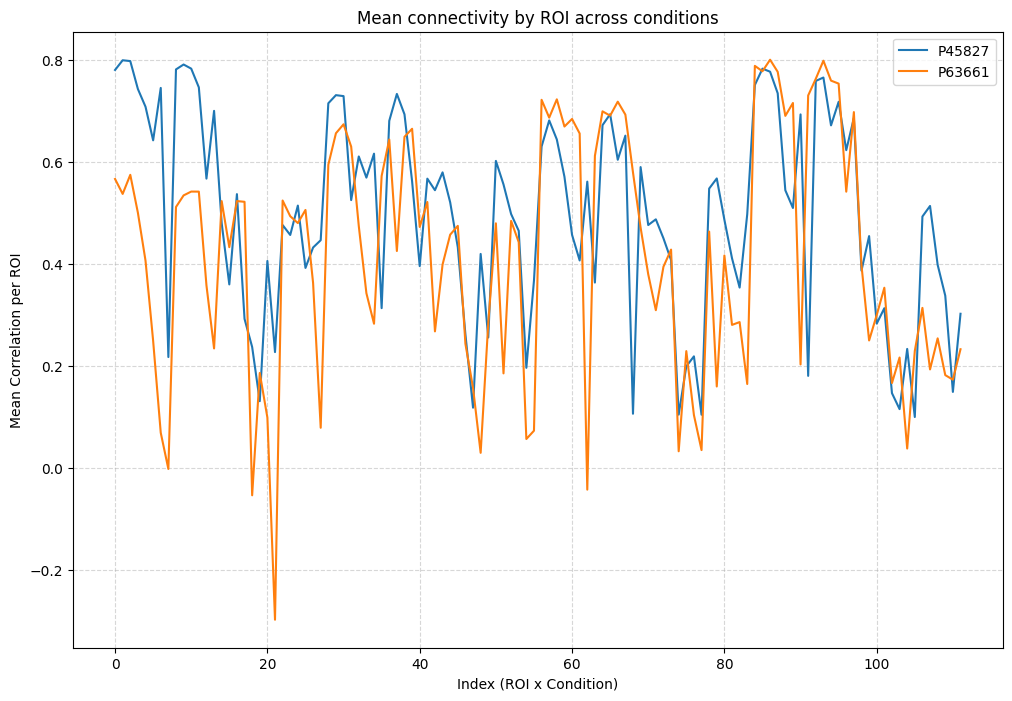

In [245]:
matrix_dict = {PID1: [p1_oxy_r, p1_deoxy_r, p1_oxy_0, p1_deoxy_0,                       p1_oxy_1, p1_deoxy_1, p1_oxy_2, p1_deoxy_2],
               PID2: [p2_oxy_r, p2_deoxy_r, p2_oxy_0, p2_deoxy_0, p2_oxy_1, p2_deoxy_1, p2_oxy_2, p2_deoxy_2],}

plot_roi_condition(matrix_dict)

In [206]:
def fingerprint_stats(data, pid):
    """Calculates the statistics across multiple participants for a given task and oxy/deoxy
    :param data: dictionary with pid's to correlation matrices"""
    matrices = data[pid]
    rows = []
    #for pid, matrices in data.items():

    # add stats for each type of matrix
    for matrix in matrices:
        rows.append([matrix.values.mean(axis=0), matrix.values.std(axis=0), matrix.values.min()])

    # assign index as ROI and columns as stats
    df = pd.DataFrame(rows, index = ['Rest O2Hb', "Rest HHb", "0-Back O2Hb", "0-Back HHb", "1-Back O2Hb", "1-Back HHb", "2-Back O2Hb", "2-Back HHb"], columns=["Mean", "Standard Deviation", "Min"])

    return df

In [219]:
stats_data1 = fingerprint_stats(matrix_dict, PID1)
stats_data2 = fingerprint_stats(matrix_dict, PID2)

stats_data1

,Mean,Standard Deviation,Min
Rest O2Hb,"[0.7809336618928997, 0.8000244867433884, 0.798...","[0.20341170463884892, 0.21015270810364242, 0.2...",0.003578
Rest HHb,"[0.48022323316379634, 0.36020629393501, 0.5373...","[0.2534385002339589, 0.264775891782229, 0.2601...",-0.417661
0-Back O2Hb,"[0.7155911852810911, 0.7315519680880926, 0.729...","[0.18860384197180238, 0.2159584468467864, 0.20...",0.005262
0-Back HHb,"[0.5450797014803571, 0.5800470526415195, 0.521...","[0.29846515128530837, 0.3278309693655188, 0.35...",-0.382712
1-Back O2Hb,"[0.6307915116200952, 0.6819655499935974, 0.644...","[0.23759901041803685, 0.23578350338554477, 0.2...",-0.191798
1-Back HHb,"[0.4767158971737917, 0.4879110508644709, 0.450...","[0.2870630289667821, 0.3621523099794423, 0.297...",-0.601468
2-Back O2Hb,"[0.7514915890255931, 0.7835710888626813, 0.777...","[0.23181052872292504, 0.2259707913531834, 0.21...",-0.147015
2-Back HHb,"[0.38725749768662066, 0.454979784111604, 0.283...","[0.31654099466882696, 0.35532226420197177, 0.3...",-0.637758


In [220]:
stats_data2

,Mean,Standard Deviation,Min
Rest O2Hb,"[0.5670651559051749, 0.5377584569059616, 0.575...","[0.42780683015078624, 0.38123302869669057, 0.4...",-0.503667
Rest HHb,"[0.5236881698575941, 0.43325741761299724, 0.52...","[0.5091084988762979, 0.5382318526554506, 0.549...",-0.728195
0-Back O2Hb,"[0.5950708281097283, 0.656790086589721, 0.6743...","[0.21322895149383245, 0.2172526729207676, 0.23...",-0.006447
0-Back HHb,"[0.26805067470666977, 0.3992319905570247, 0.45...","[0.29419940950157364, 0.4068634492737388, 0.38...",-0.308348
1-Back O2Hb,"[0.7224294671705982, 0.6874698505470064, 0.723...","[0.3041824619947966, 0.32060758308057674, 0.31...",-0.334320
1-Back HHb,"[0.3801817307234305, 0.30960403380550233, 0.39...","[0.2862499097105912, 0.25990368130764674, 0.37...",-0.510496
2-Back O2Hb,"[0.7890048382437677, 0.7783926369275186, 0.801...","[0.21464969612242552, 0.22042373749834582, 0.1...",-0.071803
2-Back HHb,"[0.3977026501006436, 0.25021613683660693, 0.30...","[0.2511754330600985, 0.4108291216200983, 0.381...",-0.487179


In [221]:
def fingerprint_similarity_pearson(matrix1, matrix2):
    """Calculates similarity between different correlation matrices between participants under the same condition
    :param matrix1: correlation matrix for participant1 for a given condition
    :param matrix2: correlation matrix for participant2 for the same condition"""
    fp1 = matrix1.values.flatten()
    fp2 = matrix2.values.flatten()

    # calculate correlation between fingerprints
    similarity = np.corrcoef(fp1, fp2)[0, 1]
    return similarity

In [236]:
print(f"Similarity O2Hb/Rest: {fingerprint_similarity_pearson(p1_oxy_r, p2_oxy_r)}")

print(f"Similarity HHb/Rest: {fingerprint_similarity_pearson(p1_deoxy_r, p2_deoxy_r)}")

print(f"Similarity O2Hb/0-Back: {fingerprint_similarity_pearson(p1_oxy_0, p2_oxy_0)}")

print(f"Similarity HHb/0-Back: {fingerprint_similarity_pearson(p1_deoxy_0, p2_deoxy_0)}")

print(f"Similarity O2Hb/1-Back: {fingerprint_similarity_pearson(p1_oxy_1, p2_oxy_1)}")

print(f"Similarity HHb/1-Back: {fingerprint_similarity_pearson(p1_deoxy_1, p2_deoxy_1)}")

print(f"Similarity O2Hb/2-Back: {fingerprint_similarity_pearson(p1_oxy_2, p2_oxy_2)}")

print(f"Similarity HHb/2-Back: {fingerprint_similarity_pearson(p1_deoxy_2, p2_deoxy_2)}")

Similarity O2Hb/Rest: 0.6374286563618718
Similarity HHb/Rest: 0.5136545446986487
Similarity O2Hb/0-Back: 0.3737677559739752
Similarity HHb/0-Back: 0.6301843462196753
Similarity O2Hb/1-Back: 0.27109414444196334
Similarity HHb/1-Back: 0.6288380831151209
Similarity O2Hb/2-Back: 0.20644670385696207
Similarity HHb/2-Back: 0.48803741140036916


          P45827    P63661
P45827  1.000000  0.637429
P63661  0.637429  1.000000


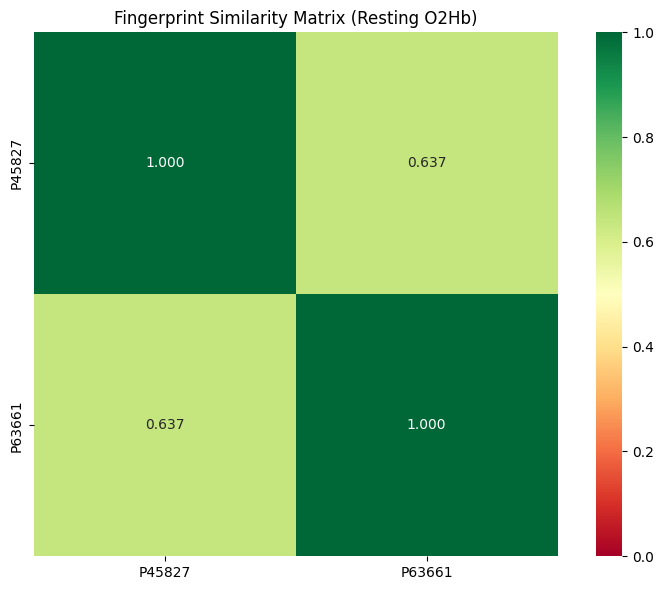

In [242]:
def compute_similarity_matrix(matrix_dict, condition='oxy_rest'):
    """Compute pairwise similarity between all participants

    Note: This plot code was generated with Claude
    """
    # Map condition names to indices
    condition_map = {
        'oxy_rest': 0, 'deoxy_rest': 1,
        'oxy_0back': 2, 'deoxy_0back': 3,
        'oxy_1back': 4, 'deoxy_1back': 5,
        'oxy_2back': 6, 'deoxy_2back': 7
    }

    idx = condition_map[condition]
    pids = list(matrix_dict.keys())
    n_participants = len(pids)

    # Initialize similarity matrix
    similarity_matrix = np.zeros((n_participants, n_participants))

    for i, pid1 in enumerate(pids):
        for j, pid2 in enumerate(pids):
            matrix1 = matrix_dict[pid1][idx]
            matrix2 = matrix_dict[pid2][idx]

            similarity_matrix[i, j] = fingerprint_similarity_pearson(matrix1, matrix2)

    # Convert to DataFrame
    sim_df = pd.DataFrame(similarity_matrix,
                          index=[f'P{pid}' for pid in pids],
                          columns=[f'P{pid}' for pid in pids])

    return sim_df

# Usage
sim_matrix = compute_similarity_matrix(matrix_dict, condition='oxy_rest')
print(sim_matrix)

# Visualize
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
            vmin=0, vmax=1, square=True)
plt.title('Fingerprint Similarity Matrix (Resting O2Hb)')
plt.tight_layout()
plt.show()

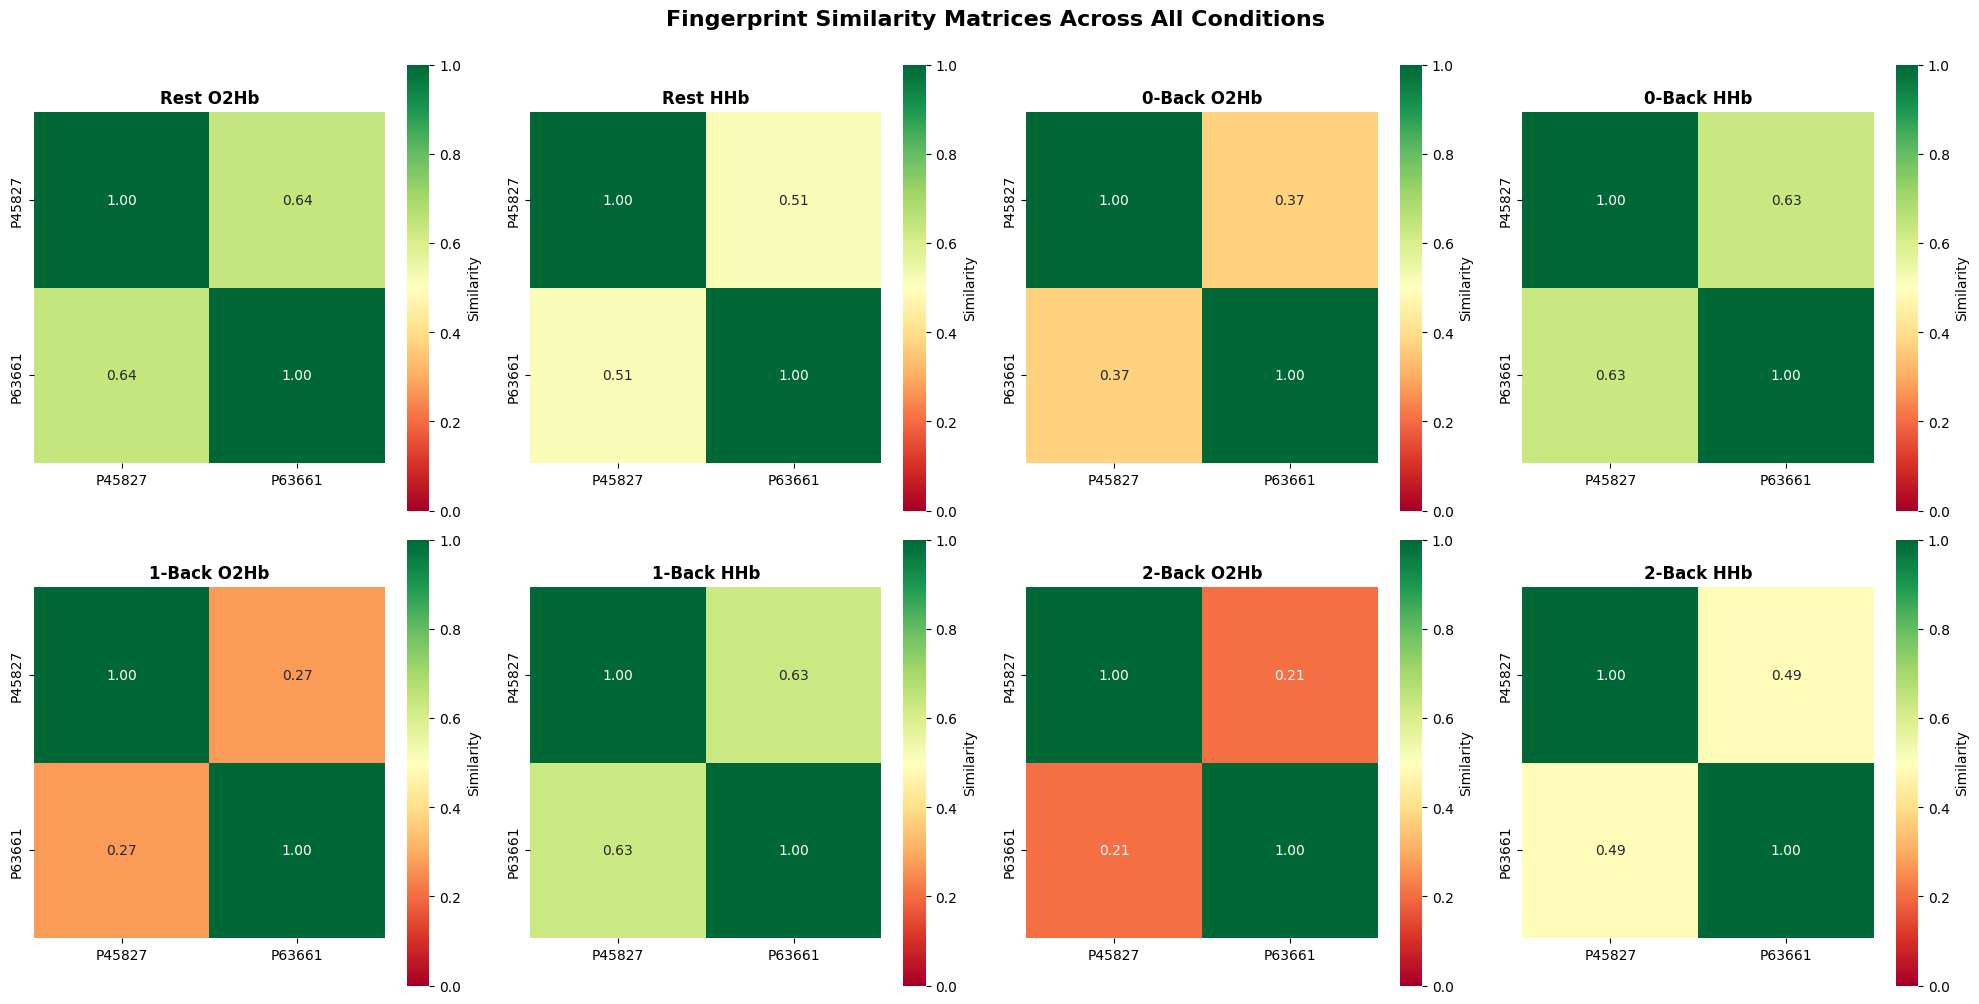

In [243]:
def plot_all_similarity_matrices(matrix_dict):
    """Plot similarity matrices for all conditions in one figure

    Note: this plot code was generated with Claude"""

    condition_map = {
        'oxy_rest': 0, 'deoxy_rest': 1,
        'oxy_0back': 2, 'deoxy_0back': 3,
        'oxy_1back': 4, 'deoxy_1back': 5,
        'oxy_2back': 6, 'deoxy_2back': 7
    }

    condition_names = {
        'oxy_rest': 'Rest O2Hb',
        'deoxy_rest': 'Rest HHb',
        'oxy_0back': '0-Back O2Hb',
        'deoxy_0back': '0-Back HHb',
        'oxy_1back': '1-Back O2Hb',
        'deoxy_1back': '1-Back HHb',
        'oxy_2back': '2-Back O2Hb',
        'deoxy_2back': '2-Back HHb'
    }

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for idx, (condition_key, condition_idx) in enumerate(condition_map.items()):
        sim_matrix = compute_similarity_matrix(matrix_dict, condition=condition_key)

        sns.heatmap(sim_matrix,
                    ax=axes[idx],
                    annot=True,
                    fmt='.2f',  # Use .2f for less clutter
                    cmap='RdYlGn',
                    vmin=0,
                    vmax=1,
                    square=True,
                    cbar_kws={'label': 'Similarity'})

        axes[idx].set_title(condition_names[condition_key], fontweight='bold')

    plt.suptitle('Fingerprint Similarity Matrices Across All Conditions',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

    return fig

# Usage
fig = plot_all_similarity_matrices(matrix_dict)